In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [10]:
def cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [11]:
model = cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_train = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 149s 47ms/step - accuracy: 0.9154 - loss: 0.2860 - val_accuracy: 0.9842 - val_loss: 0.0529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9793 - loss: 0.0759 - val_accuracy: 0.9863 - val_loss: 0.0492
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9836 - loss: 0.0560 - val_accuracy: 0.9879 - val_loss: 0.0419
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9875 - loss: 0.0457 - val_accuracy: 0.9901 - val_loss: 0.0335
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - accuracy: 0.9894 - loss: 0.0386 - val_accuracy: 0.9909 - val_loss: 0.0332
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 47ms/step - accuracy: 0.9896 - loss: 0.0347 - val_accuracy: 0.9911 - val_loss: 0.0367
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 48ms/step - accuracy: 0.9915 - loss: 0.0287 - val_accuracy: 0.9921 - val_loss: 0.0324
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9

In [14]:
testing_loss, testing_accuracy = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {testing_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9906 - loss: 0.0388

Test accuracy: 0.99


Text(0.5, 1.0, 'Accuracy Over Epochs')

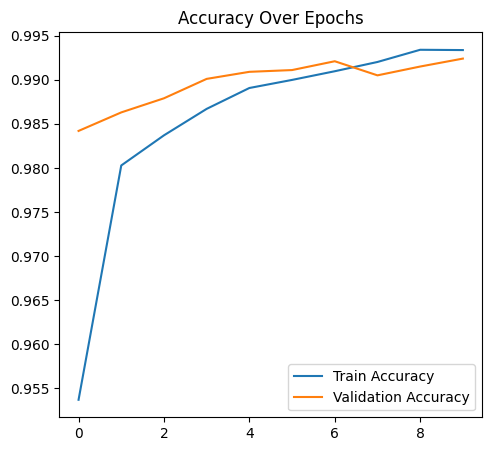

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(model_train.history['accuracy'], label='Train Accuracy')
plt.plot(model_train.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

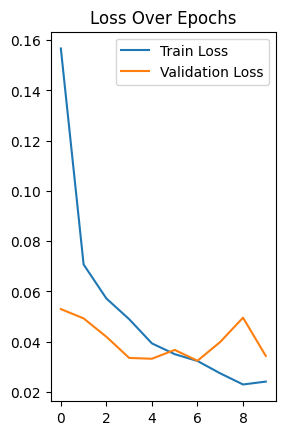

In [18]:
plt.subplot(1,2,2)
plt.plot(model_train.history['loss'], label='Train Loss')
plt.plot(model_train.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step


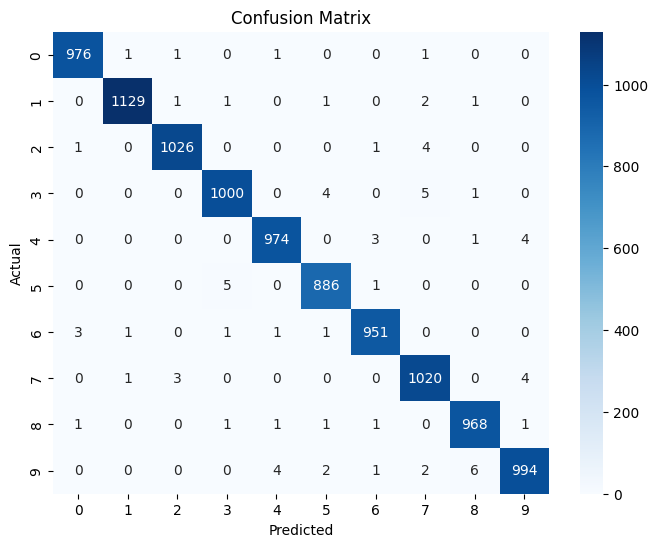

In [19]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

